In [1]:
from flygym.mujoco.arena.food_sources import FoodSource
from flygym.mujoco.arena.food_environment import OdorArena2

In [2]:
import numpy as np
import os
from pathlib import Path
import logging
from tqdm import trange
from flygym.mujoco.arena import OdorArena, OdorArenaEnriched
import matplotlib.pyplot as plt
from flygym.mujoco import Parameters
from flygym.mujoco.examples.turning_controller import HybridTurningNMF


# Odor source: array of shape (num_odor_sources, 3) - xyz coords of odor sources
sources = [FoodSource([24, 0, 1.5], [1, 0], 2), FoodSource([8, -4, 1.5], [0, 1], 1)]

logging.basicConfig(level=logging.INFO)

c:\Users\Poséidon\Desktop\RamdyaProject\flygym-scratch\flygym\mujoco\arena\sensory_environment.py:329: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(normalized_peak_intensity[0] / normalized_peak_intensity[1])


(-0.5, 799.5, 607.5, -0.5)

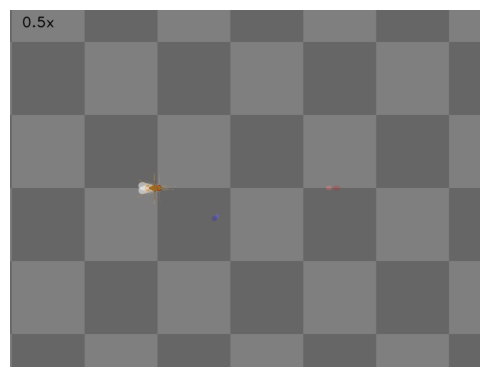

In [3]:
# Set up the arena
arena = OdorArenaEnriched(
    food_sources=sources,
    diffuse_func=lambda x: x**-2,
    marker_size=0.3,
)
# Add the NeuroMechFLy
contact_sensor_placements = [
    f"{leg}{segment}"
    for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    for segment in ["Tibia", "Tarsus1", "Tarsus2", "Tarsus3", "Tarsus4", "Tarsus5"]
]
sim_params = Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.5,
    render_window_size=(800, 608),
    enable_olfaction=True,
    enable_adhesion=True,
    draw_adhesion=False,
    render_camera="birdeye_cam",
)
sim = HybridTurningNMF(
    sim_params=sim_params,
    arena=arena,
    spawn_pos=(0, 0, 0.2),
    contact_sensor_placements=contact_sensor_placements,
    simulation_time=10,
)
for i in range(1):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")
# fig.savefig("./outputs/olfaction_env.png")

In [5]:
print(
    "Positions in 1st way :",
    np.array([source.position for source in arena.food_sources]),
)
print("Positions in 2nd way :", arena.odor_source)

Positions in 1st way : [[24.   0.   1.5]
 [ 8.  -4.   1.5]]
Positions in 2nd way : [[24.   0.   1.5]
 [ 8.  -4.   1.5]]
